In [1]:
import os

import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv("../data/x_ray/labels_x_ray.csv")
df.head()

,image_Addr,label_image
0,100120000004.jpg,4
1,100150000077.jpg,5
2,100120000027.jpg,4
3,10030000008.jpg,1
4,10030000045.jpg,1


<Axes: xlabel='label_image'>

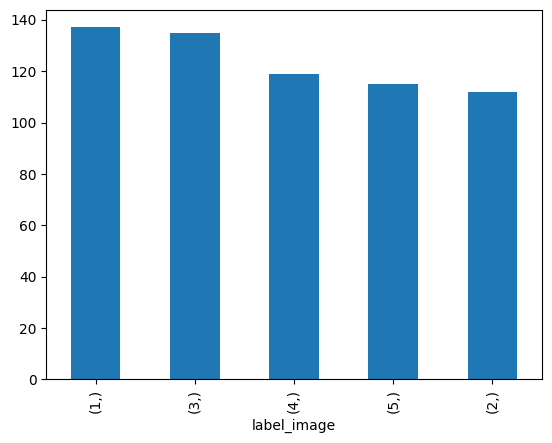

In [7]:
df[['label_image']].value_counts().plot(kind='bar')

# Filter manually selected bad files

In [8]:
import os

with open("../data/bad_files.txt", "r") as f:
    lines = f.readlines()
    bad_files = [l.strip() for l in lines]
filtered_df = df[~df['image_Addr'].isin(bad_files)]

# Covert Images to Gray Scale

In [9]:
from PIL import Image
from pathlib import Path
Path("../data/new_x_ray").mkdir(parents=True, exist_ok=True)

for addr in filtered_df["image_Addr"]:
    img = Image.open(os.path.join("../data/x_ray", addr))
    img = img.convert('L')
    img = img.convert('RGB')
    img.save(os.path.join("../data/new_x_ray", addr)) 

C:\Users\Atlas\anaconda3\envs\golgohar\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
